In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
DATASET_PATH = './Assets/Datasets/webmd-drug-reviews-dataset.csv'

In [3]:
df = pd.read_csv(DATASET_PATH)

In [4]:
df[:5]

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I\m a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,NaN,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 powder,144731,2,2,FALLING AND DON\T REALISE IT',1,Female,NaN,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,NaN,1


In [5]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            350604 non-null  object
 1   Condition      362763 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        320969 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            336269 non-null  object
 10  Sides          345330 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 309.5 MB


In [6]:
df[:5]

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I\m a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,NaN,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 powder,144731,2,2,FALLING AND DON\T REALISE IT',1,Female,NaN,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,NaN,1


| Nama Kolom | Deskripsi Kolom|
|--------|-----------|
| **Age**| Usia pengguna saat memberikan ulasan, dalam bentuk rentang usia (misalnya, "75 or over"). Kolom ini membantu dalam menganalisis bagaimana usia mempengaruhi pengalaman pengguna terhadap obat tertentu.|
| **Condition**| Kondisi medis atau penyakit yang dialami oleh pengguna. Ini adalah kondisi utama yang menjadi alasan pengguna mengambil obat yang diulas.|
| **Date**| Tanggal ulasan diberikan, dalam format "MM/DD/YYYY". Tanggal ini dapat digunakan untuk menganalisis tren ulasan dari waktu ke waktu.|
| **Drug**| Nama obat yang diulas oleh pengguna. Kolom ini memberikan informasi tentang obat spesifik yang digunakan oleh pasien.|
| **DrugId**| Identifikasi unik untuk setiap obat. Ini adalah kode numerik yang digunakan untuk mengidentifikasi obat secara unik dalam dataset, memungkinkan analisis berdasarkan obat tertentu.|
| **EaseofUse**| Peringkat yang diberikan oleh pengguna terkait kemudahan penggunaan obat, biasanya pada skala 1 hingga 10. Kolom ini membantu mengukur tingkat kenyamanan pengguna saat menggunakan obat tersebut.|
| **Effectiveness**| Peringkat yang diberikan oleh pengguna terkait efektivitas obat dalam menangani kondisi yang diobati, juga pada skala 1 hingga 10. Ini penting untuk mengevaluasi seberapa baik obat bekerja menurut pengalaman pengguna.|
| **Reviews**| Teks ulasan yang ditulis oleh pengguna, berisi pengalaman dan opini mereka terkait penggunaan obat. Ini adalah kolom yang mengandung data teks tidak terstruktur yang bisa dianalisis lebih lanjut, misalnya untuk sentiment analysis atau extraction of key phrases.|
| **Satisfaction**| Peringkat yang menunjukkan kepuasan keseluruhan pengguna terhadap obat tersebut, juga pada skala 1 hingga 10. Kolom ini memberikan gambaran umum tentang tingkat kepuasan pengguna setelah menggunakan obat.|
| **Sex**| Jenis kelamin pengguna, biasanya diisi dengan "Male" atau "Female". Kolom ini membantu dalam memahami bagaimana jenis kelamin dapat mempengaruhi pengalaman dengan obat tertentu.|
| **Sides**| Efek samping yang dialami pengguna sebagai akibat dari penggunaan obat. Ini adalah deskripsi teks yang merinci efek samping yang dilaporkan oleh pengguna.|
| **UsefulCount**| Jumlah orang yang menilai ulasan tersebut sebagai bermanfaat. Kolom ini menunjukkan seberapa berguna ulasan tersebut menurut pengguna lain, dan bisa menjadi indikator kualitas ulasan.|

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Age            350604 non-null  object        
 1   Condition      362763 non-null  object        
 2   Date           362806 non-null  datetime64[ns]
 3   Drug           362806 non-null  object        
 4   DrugId         362806 non-null  int64         
 5   EaseofUse      362806 non-null  int64         
 6   Effectiveness  362806 non-null  int64         
 7   Reviews        320969 non-null  object        
 8   Satisfaction   362806 non-null  int64         
 9   Sex            336269 non-null  object        
 10  Sides          345330 non-null  object        
 11  UsefulCount    362806 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 33.2+ MB


## **TO DO LIST**

#### 1. **Analisis Demografis (Usia dan Jenis Kelamin)**
   - **Tujuan:** Memahami bagaimana usia dan jenis kelamin mempengaruhi pengalaman pengguna dengan obat.
   - **Insight Potensial:**
     - Apakah ada kelompok usia atau jenis kelamin tertentu yang lebih cenderung mengalami efek samping tertentu?
     - Bagaimana peringkat kepuasan dan efektivitas berbeda di antara berbagai kelompok demografis?

#### 2. **Analisis Efektivitas dan Kepuasan**
   - **Tujuan:** Menilai seberapa baik obat-obatan memenuhi kebutuhan pengguna berdasarkan peringkat efektivitas dan kepuasan.
   - **Insight Potensial:**
     - Obat mana yang paling efektif dan memuaskan pengguna?
     - Apakah ada korelasi antara efektivitas obat dan tingkat kepuasan pengguna?
     - Identifikasi obat-obatan dengan peringkat rendah yang mungkin memerlukan peningkatan atau pengkajian lebih lanjut.

#### 3. **Analisis Kondisi Medis**
   - **Tujuan:** Mengkaji apakah obat tertentu lebih efektif untuk kondisi medis tertentu.
   - **Insight Potensial:**
     - Obat mana yang paling efektif untuk kondisi medis tertentu?
     - Apakah ada kondisi medis yang sulit diatasi dengan obat yang ada di dataset?

#### 4. **Analisis Efek Samping**
   - **Tujuan:** Mengidentifikasi pola efek samping yang sering muncul, terutama yang serius.
   - **Insight Potensial:**
     - Efek samping mana yang paling sering dilaporkan untuk setiap obat?
     - Apakah ada efek samping tertentu yang menyebabkan penurunan tingkat kepuasan?
     - Analisis risiko manfaat: Apakah efek samping ini dapat diterima dibandingkan dengan manfaat obat?

#### 5. **Analisis Waktu (Temporal Analysis)**
   - **Tujuan:** Memahami bagaimana pengalaman pengguna berubah seiring waktu.
   - **Insight Potensial:**
     - Tren perubahan dalam efektivitas atau kepuasan obat dari waktu ke waktu.
     - Apakah ada periode waktu tertentu di mana peringkat obat lebih baik atau lebih buruk?

#### 6. **Analisis Teks Ulasan (Sentiment Analysis)**
   - **Tujuan:** Mengekstrak pola atau tema umum dari ulasan pengguna.
   - **Insight Potensial:**
     - Sentimen umum pengguna terhadap obat.
     - Kata-kata kunci atau frasa yang sering muncul dalam ulasan yang dapat mengindikasikan masalah atau keunggulan tertentu.
     - Analisis sentimen terhadap efektivitas obat, efek samping, dan kepuasan keseluruhan.

#### 7. **Analisis Keterkaitan Penggunaan Obat**
   - **Tujuan:** Melihat hubungan antara kemudahan penggunaan, efektivitas, kepuasan, dan efek samping.
   - **Insight Potensial:**
     - Apakah obat yang mudah digunakan lebih mungkin mendapatkan peringkat kepuasan tinggi?
     - Hubungan antara dosis yang disarankan dan efek samping yang dilaporkan.

#### 8. **Analisis Tingkat Kepentingan Ulasan (UsefulCount)**
   - **Tujuan:** Menilai ulasan mana yang paling berpengaruh atau dianggap paling bermanfaat oleh pengguna lain.
   - **Insight Potensial:**
     - Ulasan mana yang paling bermanfaat, dan apa yang membuat ulasan tersebut lebih berguna?
     - Fokus pada ulasan dengan tinggi `UsefulCount` untuk memahami pengalaman yang mungkin mewakili mayoritas pengguna.

#### 9. **Komparasi Obat (Comparative Analysis)**
   - **Tujuan:** Membandingkan efektivitas dan kepuasan antar obat yang digunakan untuk kondisi medis yang sama.
   - **Insight Potensial:**
     - Obat mana yang lebih baik atau lebih buruk dibandingkan yang lain untuk kondisi medis yang sama?
     - Apakah ada alternatif yang lebih baik untuk obat tertentu berdasarkan ulasan dan peringkat?

#### 10. **Rekomendasi untuk Tindakan Selanjutnya**
   - Berdasarkan temuan di atas, rekomendasikan tindakan yang perlu diambil, seperti fokus pada peningkatan obat tertentu, kampanye pemasaran yang menargetkan kelompok demografis tertentu, atau penelitian lebih lanjut tentang efek samping.

### 1. **Efektivitas Obat Berdasarkan Kondisi Medis**

In [122]:
# Langkah 1: Mengelompokkan data berdasarkan Condition dan Drug, lalu menghitung rata-rata Effectiveness
group_drug_by_condition = df.pivot_table(index=['Condition', 'Drug'], values=['Effectiveness', 'Satisfaction', 'EaseofUse']).reset_index()

In [123]:
group_drug_by_condition

,Condition,Drug,EaseofUse,Effectiveness,Satisfaction
0,A Breaking Out of the Skin Resembling Acne,acnomel cream,5.0,5.0,5.0
1,A Chronic Multisystem Inflammatory Disorder,colchicine,4.8,4.4,4.6
2,A Chronic Multisystem Inflammatory Disorder,colchicine 0.6 mg/5 ml oral solution,4.8,4.4,4.6
3,A Chronic Multisystem Inflammatory Disorder,thalidomide capsule,1.0,1.0,2.0
4,A Condition in which Hair Falls Out in Patches,drithocreme hp cream,5.0,5.0,5.0
...,...,...,...,...,...
21624,seborrheic dermatitis of scalp,ciclopirox cream,4.0,3.0,2.0
21625,seborrheic dermatitis of scalp,ciclopirox gel,4.0,3.0,2.0
21626,seborrheic dermatitis of scalp,ciclopirox shampoo,4.0,3.0,2.0
21627,seborrheic dermatitis of scalp,"ciclopirox solution, non-",4.0,3.0,2.0


In [124]:
# Langkah 2: Mencari obat dengan efektivitas tertinggi untuk setiap kondisi
best_drug_by_condition = group_drug_by_condition.pivot_table(index='Condition', values='Effectiveness', aggfunc=lambda x: x.idxmax())['Effectiveness']

In [125]:
best_drug_by_condition

Condition
A Breaking Out of the Skin Resembling Acne                         0
A Chronic Multisystem Inflammatory Disorder                        1
A Condition in which Hair Falls Out in Patches                     4
A Condition of Bladder Dysfunction from Nerve Disorder            18
A Feeling of Restlessness with Inability to Sit Still             23
                                                               ...  
primary progressive multiple sclerosis                         21620
raised seborrheic keratosis                                    21621
refractory lung disease due to MAC                             21622
renal cell carcinoma adjuvant therapy following nephrectomy    21623
seborrheic dermatitis of scalp                                 21624
Name: Effectiveness, Length: 1805, dtype: int64

In [127]:
best_drugs = group_drug_by_condition.loc[best_drug_by_condition]
best_drugs.to_csv('./Assets/Export-Extracted-Dataset/best-drugs.csv', index=False, sep='\t') # Save best drugs for analysis
# Langkah 4: Menampilkan hasilnya
print("Obat dengan Efektivitas Tertinggi untuk Setiap Kondisi Medis:")
display(best_drugs)

Obat dengan Efektivitas Tertinggi untuk Setiap Kondisi Medis:


,Condition,Drug,EaseofUse,Effectiveness,Satisfaction
0,A Breaking Out of the Skin Resembling Acne,acnomel cream,5.00,5.00,5.00
1,A Chronic Multisystem Inflammatory Disorder,colchicine,4.80,4.40,4.60
4,A Condition in which Hair Falls Out in Patches,drithocreme hp cream,5.00,5.00,5.00
18,A Condition of Bladder Dysfunction from Nerve ...,"oxytrol for women patch,transdermal 4 day",5.00,5.00,5.00
23,A Feeling of Restlessness with Inability to Si...,diazepam,5.00,5.00,5.00
...,...,...,...,...,...
21620,primary progressive multiple sclerosis,ocrevus vial,5.00,1.00,1.00
21621,raised seborrheic keratosis,eskata solution with applicator,2.75,2.75,2.25
21622,refractory lung disease due to MAC,arikayce vial for nebulizer,2.00,2.00,4.00
21623,renal cell carcinoma adjuvant therapy followin...,sutent,4.00,4.00,5.00


### 1. **Analisis Demografis (Usia dan Jenis Kelamin)**
   - **Tujuan:** Memahami bagaimana usia dan jenis kelamin mempengaruhi pengalaman pengguna dengan obat.
   - **Insight Potensial:**
     - Apakah ada kelompok usia atau jenis kelamin tertentu yang lebih cenderung mengalami efek samping tertentu?
     - Bagaimana peringkat kepuasan dan efektivitas berbeda di antara berbagai kelompok demografis?


#### **1.1 Distribusi Usia Pengguna**
**Kita mulai dengan menganalisis distribusi usia pengguna obat.**

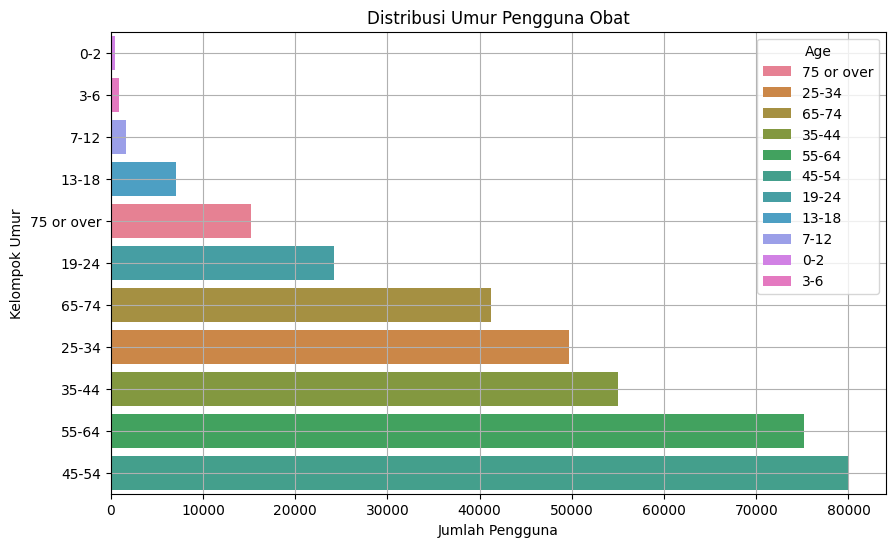

In [43]:
# Plot distribusi umur
plt.figure(figsize=(10, 6))
sns.countplot(y='Age', hue='Age', data=df, order=df['Age'].value_counts(ascending=True).index)
plt.title('Distribusi Umur Pengguna Obat')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Kelompok Umur')
plt.grid()
plt.show()

#### **1.2 Efek Samping Berdasarkan Usia**
**Selanjutnya, kita akan mengecek bagaimana usia mempengaruhi efek samping yang dilaporkan.**

In [65]:
total_users_by_age = df['Age'].value_counts().reset_index()
total_users_by_age.columns = ['Age', 'Total_Users']
side_effects_by_age = df.pivot_table(index='Age', values='Sides', aggfunc='count').reset_index().sort_values(by='Sides')
side_effects_by_age.columns = ['Age', 'Number_of_Side_Effects']

# Gabungkan total pengguna dan efek samping
age_side_effects = pd.merge(total_users_by_age, side_effects_by_age, on='Age')

# Hitung persentase efek samping per pengguna
age_side_effects['Side_Effects_Per_User'] = (age_side_effects['Number_of_Side_Effects'] / 
                                             age_side_effects['Total_Users']) * 100

In [66]:
age_side_effects

,Age,Total_Users,Number_of_Side_Effects,Side_Effects_Per_User
0,45-54,80043,76283,95.302525
1,55-64,75136,70286,93.545038
2,35-44,55011,53094,96.515242
3,25-34,49718,48345,97.238425
4,65-74,41216,38182,92.638781
5,19-24,24230,23663,97.659926
6,75 or over,15226,14254,93.616183
7,13-18,7045,6882,97.686302
8,7-12,1644,1566,95.255474
9,3-6,838,763,91.050119


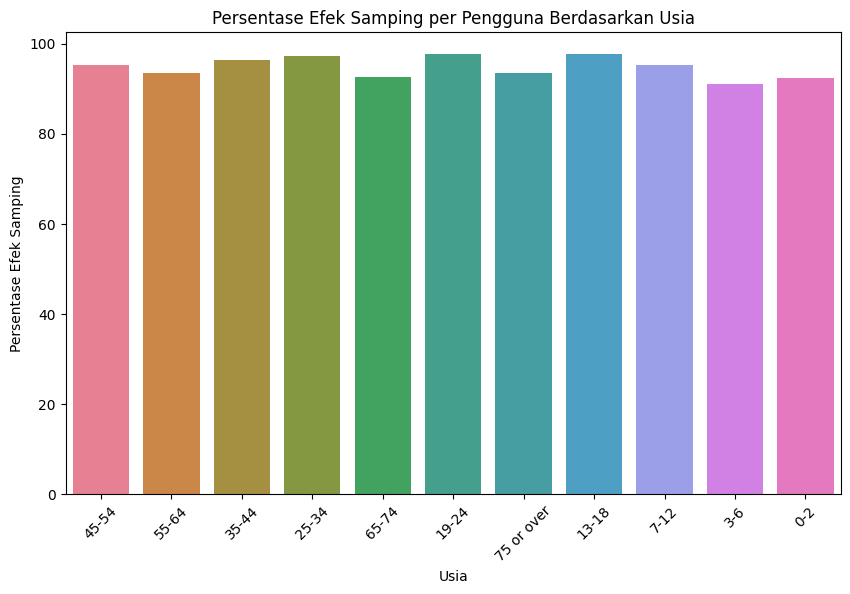

In [68]:
# Plot persentase efek samping per pengguna berdasarkan usia
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Side_Effects_Per_User', data=age_side_effects, hue='Age')
plt.title('Persentase Efek Samping per Pengguna Berdasarkan Usia')
plt.xlabel('Usia')
plt.ylabel('Persentase Efek Samping')
plt.xticks(rotation=45)
plt.show()

#### **1.3 Analisis Kepuasan dan Efektivitas Berdasarkan Usia**

In [28]:
# Menghitung rata-rata kepuasan dan efektivitas berdasarkan usia
age_satisfaction_effectiveness = df.groupby('Age')[['Satisfaction', 'Effectiveness']].mean().reset_index()
age_satisfaction_effectiveness

,Age,Satisfaction,Effectiveness
0,0-2,2.843058,3.267606
1,13-18,2.922072,3.502200
2,19-24,3.045976,3.702724
3,25-34,3.133895,3.649463
4,3-6,2.880668,3.256563
5,35-44,3.220956,3.590173
6,45-54,3.190922,3.540185
7,55-64,3.127649,3.484615
8,65-74,3.090644,3.432138
9,7-12,2.924574,3.296229


In [33]:
age_satisfaction_effectiveness = df.pivot_table(index='Age', values=['Satisfaction', 'Effectiveness'], aggfunc='mean').reset_index()
age_satisfaction_effectiveness

,Age,Effectiveness,Satisfaction
0,0-2,3.267606,2.843058
1,13-18,3.502200,2.922072
2,19-24,3.702724,3.045976
3,25-34,3.649463,3.133895
4,3-6,3.256563,2.880668
5,35-44,3.590173,3.220956
6,45-54,3.540185,3.190922
7,55-64,3.484615,3.127649
8,65-74,3.432138,3.090644
9,7-12,3.296229,2.924574


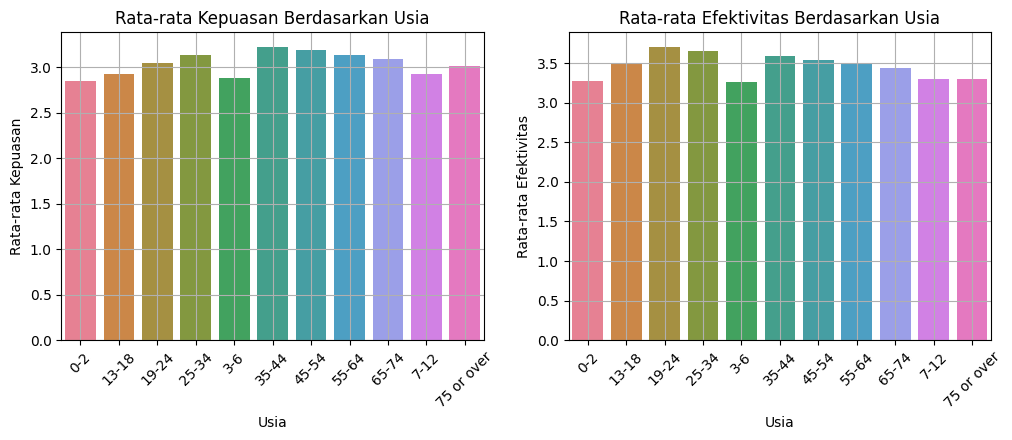

In [42]:
# Plot rata-rata kepuasan berdasarkan usia
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.barplot(x='Age', y='Satisfaction', data=age_satisfaction_effectiveness, hue='Age')
plt.title('Rata-rata Kepuasan Berdasarkan Usia')
plt.xlabel('Usia')
plt.ylabel('Rata-rata Kepuasan')
plt.xticks(rotation=45)
plt.grid()

# Plot rata-rata efektivitas berdasarkan usia
plt.subplot(1, 2, 2)
sns.barplot(x='Age', y='Effectiveness', data=age_satisfaction_effectiveness, hue='Age')
plt.title('Rata-rata Efektivitas Berdasarkan Usia')
plt.xlabel('Usia')
plt.ylabel('Rata-rata Efektivitas')
plt.xticks(rotation=45)
plt.grid()

plt.show()

#### **1.4 Distribusi Jenis Kelamin Pengguna**

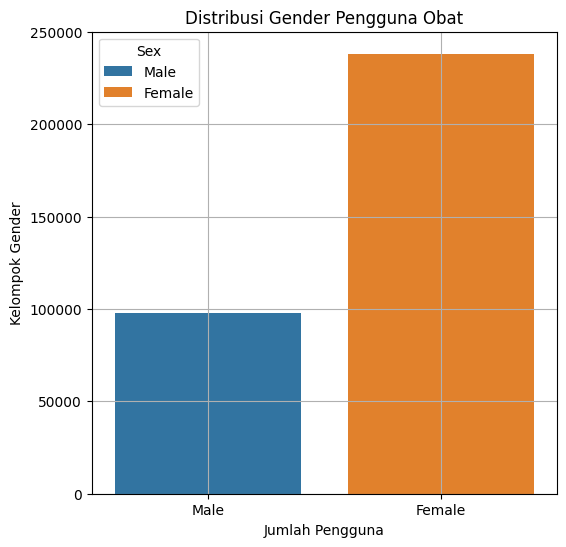

In [54]:
# Plot distribusi umur
plt.figure(figsize=(6, 6))
sns.countplot(x='Sex', hue='Sex', data=df)
plt.title('Distribusi Gender Pengguna Obat')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Kelompok Gender')
plt.grid()
plt.show()

#### **1.5 Efek Samping Berdasarkan Jenis Kelamin**

In [72]:
total_users_by_sex = df['Sex'].value_counts().reset_index()
total_users_by_sex.columns = ['Sex', 'Total_Users']
side_effects_by_sex = df.pivot_table(index='Sex', values='Sides', aggfunc='count').reset_index().sort_values(by='Sides')
side_effects_by_sex.columns = ['Sex', 'Number_of_Side_Effects']

# Gabungkan total pengguna dan efek samping
sex_side_effects = pd.merge(total_users_by_sex, side_effects_by_sex, on='Sex')

# Hitung persentase efek samping per pengguna
sex_side_effects['Side_Effects_Per_User'] = (sex_side_effects['Number_of_Side_Effects'] / 
                                             sex_side_effects['Total_Users']) * 100

In [73]:
sex_side_effects

,Sex,Total_Users,Number_of_Side_Effects,Side_Effects_Per_User
0,Female,238226,227505,95.499652
1,Male,98043,92572,94.419795


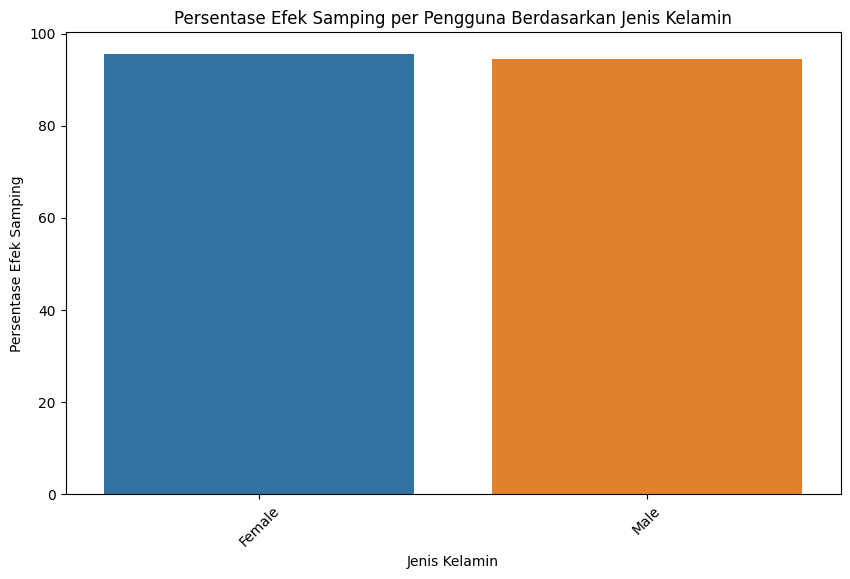

In [75]:
# Plot persentase efek samping per pengguna berdasarkan usia
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Side_Effects_Per_User', data=sex_side_effects, hue='Sex')
plt.title('Persentase Efek Samping per Pengguna Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Persentase Efek Samping')
plt.xticks(rotation=45)
plt.show()

In [76]:
sex_satisfaction_effectiveness = df.pivot_table(index='Sex', values=['Satisfaction', 'Effectiveness'], aggfunc='mean').reset_index()
sex_satisfaction_effectiveness 

,Sex,Effectiveness,Satisfaction
0,Female,3.527113,3.092664
1,Male,3.566405,3.265445


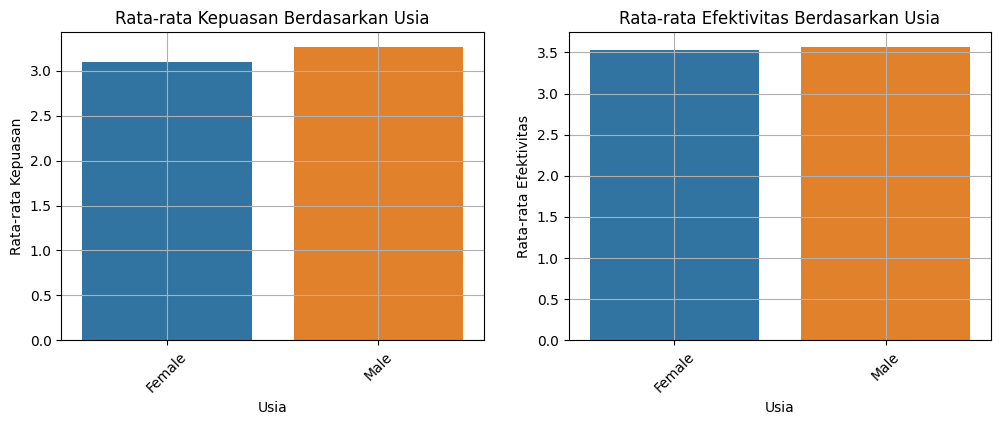

In [77]:
# Plot rata-rata kepuasan berdasarkan usia
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.barplot(x='Sex', y='Satisfaction', data=sex_satisfaction_effectiveness, hue='Sex')
plt.title('Rata-rata Kepuasan Berdasarkan Usia')
plt.xlabel('Usia')
plt.ylabel('Rata-rata Kepuasan')
plt.xticks(rotation=45)
plt.grid()

# Plot rata-rata efektivitas berdasarkan usia
plt.subplot(1, 2, 2)
sns.barplot(x='Sex', y='Effectiveness', data=sex_satisfaction_effectiveness, hue='Sex')
plt.title('Rata-rata Efektivitas Berdasarkan Usia')
plt.xlabel('Usia')
plt.ylabel('Rata-rata Efektivitas')
plt.xticks(rotation=45)
plt.grid()

plt.show()

### 2 **Analisis Efektivitas dan Kepuasan**
   - **Tujuan:** Menilai seberapa baik obat-obatan memenuhi kebutuhan pengguna berdasarkan peringkat efektivitas dan kepuasan.
   - **Insight Potensial:**
     - Obat mana yang paling efektif dan memuaskan pengguna?
     - Apakah ada korelasi antara efektivitas obat dan tingkat kepuasan pengguna?
     - Identifikasi obat-obatan dengan peringkat rendah yang mungkin memerlukan peningkatan atau pengkajian lebih lanjut.

In [86]:
# Menghitung statistik deskriptif
effectiveness_desc = df[['Effectiveness']].describe()
satisfaction_desc = df[['Satisfaction']].describe()

In [87]:
effectiveness_desc.T

,count,mean,std,min,25%,50%,75%,max
Effectiveness,362806.0,3.532061,1.455961,1.0,3.0,4.0,5.0,10.0


In [88]:
satisfaction_desc.T

,count,mean,std,min,25%,50%,75%,max
Satisfaction,362806.0,3.135408,1.611106,1.0,1.0,3.0,5.0,10.0


In [91]:
# Menghitung korelasi antara efektivitas dan kepuasan
correlation = df[['Effectiveness', 'Satisfaction']].corr()
print("Korelasi antara Efektivitas dan Kepuasan:\n", correlation)

Korelasi antara Efektivitas dan Kepuasan:
                Effectiveness  Satisfaction
Effectiveness       1.000000      0.793221
Satisfaction        0.793221      1.000000
